In [ ]:
# Task 2: Modular and Robust Exploratory Data Analysis (EDA)

✅ Loaded dataset with shape: (95662, 19)
🔍 Data Overview


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionWeekday
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2,0,2,15,3
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20.0,2018-11-15 02:19:08+00:00,2,0,2,15,3
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15 02:44:21+00:00,2,0,2,15,3
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,7075.0,12087.5,2018-11-15 03:32:55+00:00,2,0,3,15,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15 03:34:21+00:00,2,0,3,15,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  float64
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

,CountryCode,Amount,Value,PricingStrategy,FraudResult,TransactionHour,TransactionDay,TransactionWeekday
count,95662.0,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000,95662.000000
mean,256.0,1449.051201,3403.667282,2.255974,0.002018,12.447722,15.902898,3.011907
std,0.0,3210.808287,4168.243292,0.732924,0.044872,4.846964,8.962822,1.863651
min,256.0,-4325.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,256.0,-50.000000,275.000000,2.000000,0.000000,8.000000,8.000000,1.000000
50%,256.0,1000.000000,1000.000000,2.000000,0.000000,13.000000,16.000000,3.000000
75%,256.0,2800.000000,5000.000000,2.000000,0.000000,17.000000,24.000000,4.000000
max,256.0,7075.000000,12087.500000,4.000000,1.000000,23.000000,31.000000,6.000000


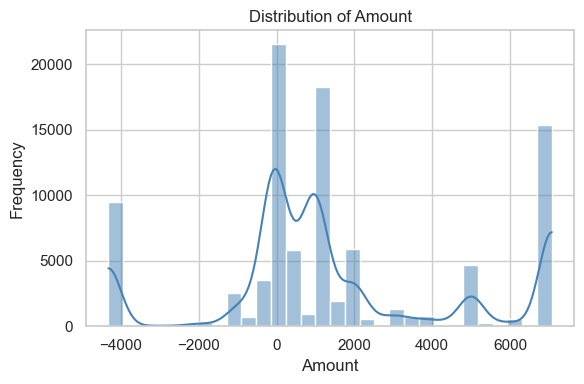

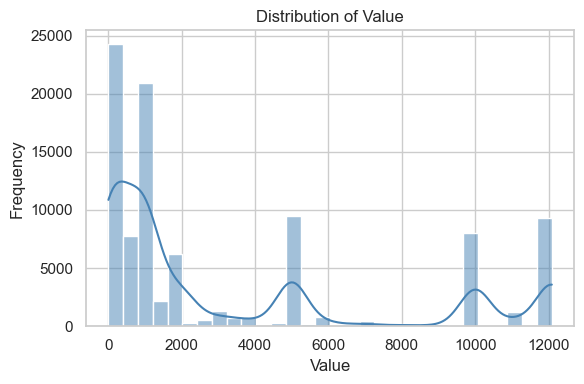

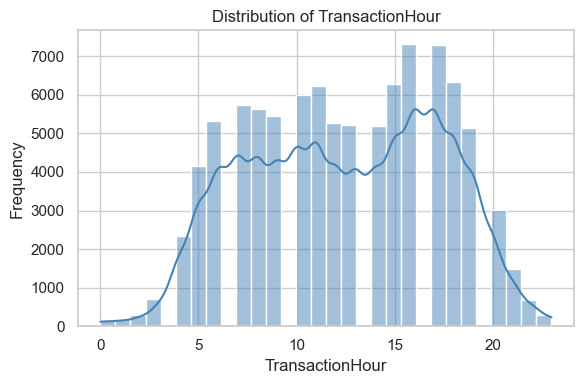

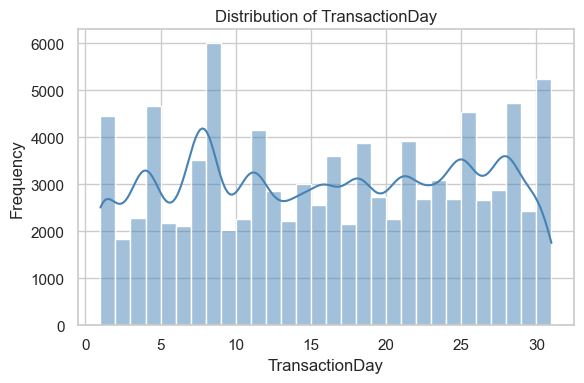

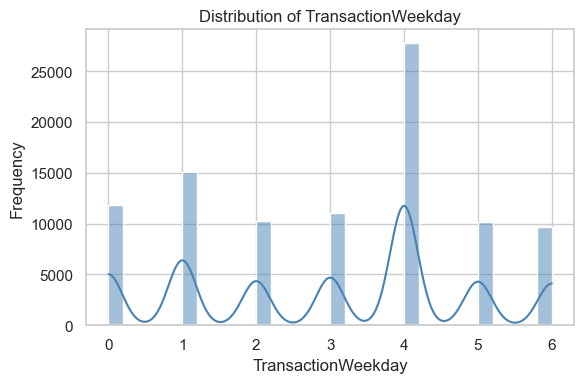

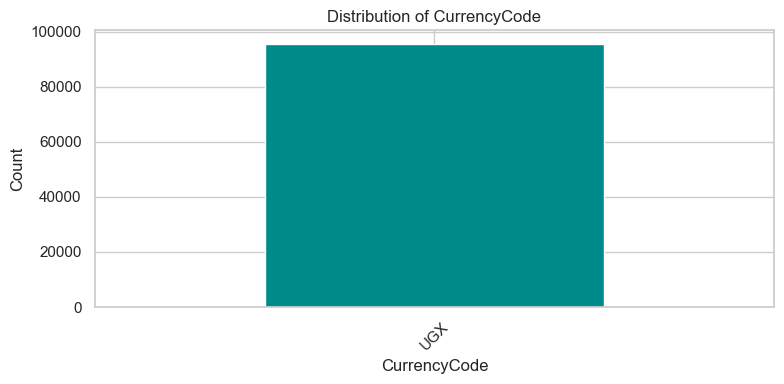

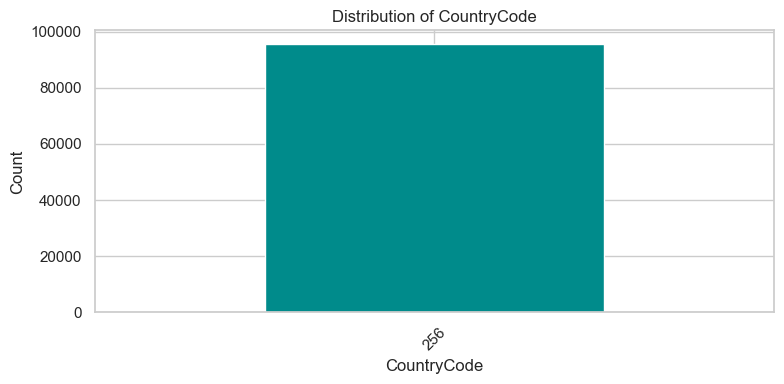

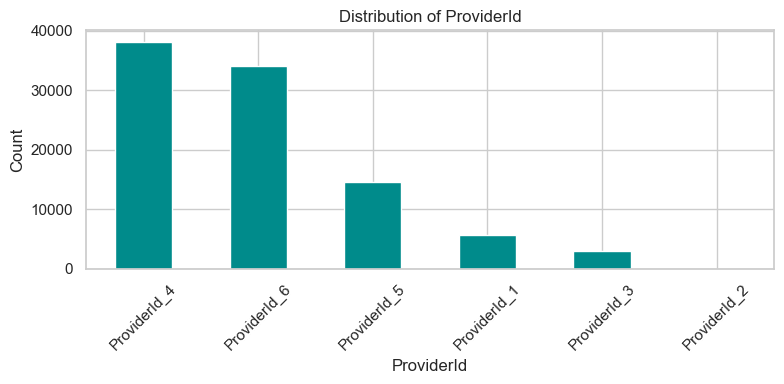

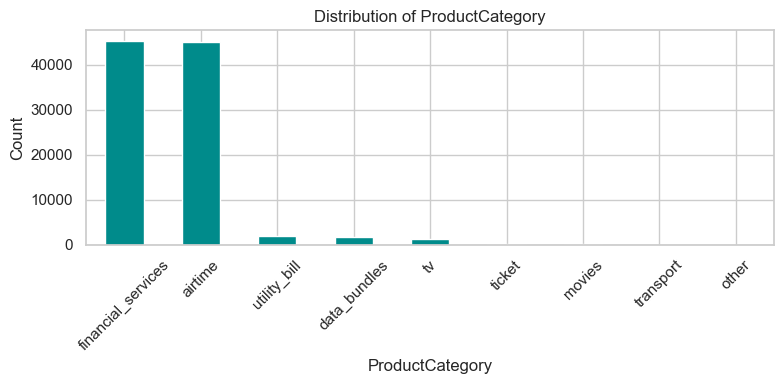

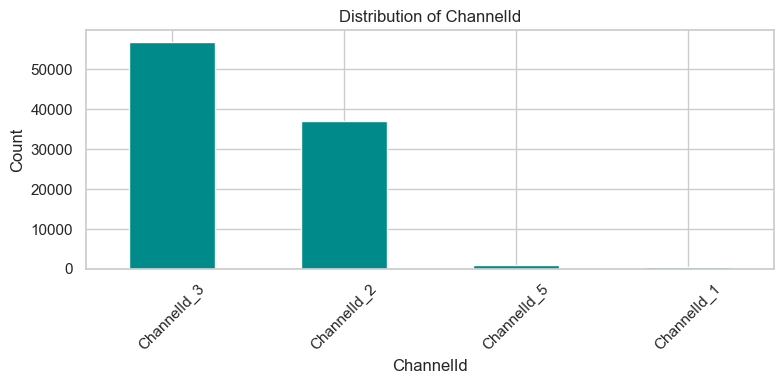

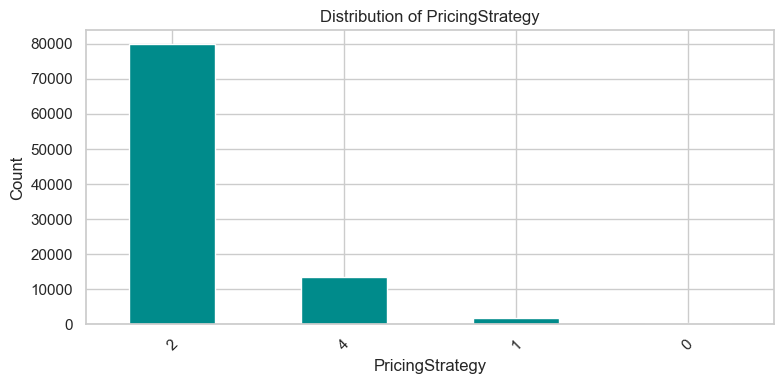

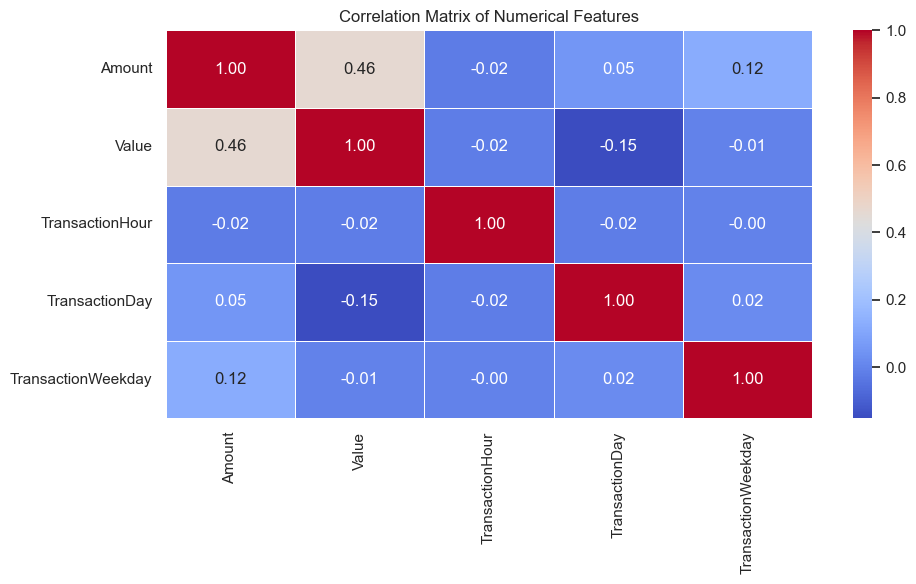

✅ No missing values detected.


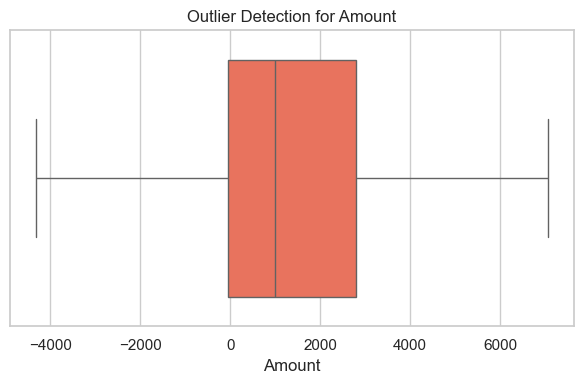

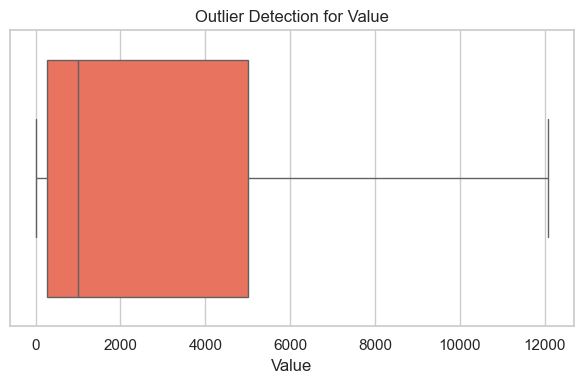

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown as md

# Setup
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# Load Data
def load_data(path: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    print(f"✅ Loaded dataset with shape: {df.shape}")
    return df

# Overview of the Data
def data_overview(df: pd.DataFrame):
    print("🔍 Data Overview")
    display(df.head())
    df.info()

# Summary Statistics
def summary_statistics(df: pd.DataFrame):
    print("📈 Summary Statistics")
    display(df.describe(include=[np.number]))

# Distribution of Numerical Features
def plot_numerical_distributions(df: pd.DataFrame, cols: list):
    for col in cols:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=30, color='steelblue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

# Distribution of Categorical Features
def plot_categorical_distributions(df: pd.DataFrame, cols: list):
    for col in cols:
        plt.figure(figsize=(8, 4))
        df[col].value_counts().head(20).plot(kind='bar', color='darkcyan')
        plt.title(f'Distribution of {col}')
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Correlation Analysis
def correlation_analysis(df: pd.DataFrame, cols: list):
    plt.figure(figsize=(10, 6))
    corr = df[cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Numerical Features")
    plt.tight_layout()
    plt.show()

# Missing Values
def check_missing_values(df: pd.DataFrame):
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    if not missing.empty:
        print("⚠️ Missing Values Detected:")
        display(missing)
    else:
        print("✅ No missing values detected.")

# Outlier Detection
def detect_outliers(df: pd.DataFrame, cols: list):
    for col in cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], color='tomato')
        plt.title(f'Outlier Detection for {col}')
        plt.tight_layout()
        plt.show()

# Insight Summary
def summarize_insights():
    md("""
    Top 3–5 EDA Insights

    1. Transaction Amounts and Values are heavily right-skewed, indicating a small number of high-value transactions.
    2. ChannelId** shows Android as the dominant platform, which may correlate with fraud or user behavior patterns.
    3. ProductCategory and ProviderId are highly imbalanced, suggesting the need for encoding or grouping rare categories.
    4. Amount and Value are nearly perfectly correlated, indicating potential redundancy.
    5. No missing values remain after preprocessing, ensuring a clean foundation for modeling.
    """)


def run_eda():
    df = load_data("../data/processed/cleaned_transactions.csv")
    
    numerical_cols = ['Amount', 'Value', 'TransactionHour', 'TransactionDay', 'TransactionWeekday']
    categorical_cols = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductCategory', 'ChannelId', 'PricingStrategy']
    
    data_overview(df)
    summary_statistics(df)
    plot_numerical_distributions(df, numerical_cols)
    plot_categorical_distributions(df, categorical_cols)
    correlation_analysis(df, numerical_cols)
    check_missing_values(df)
    detect_outliers(df, ['Amount', 'Value'])
    summarize_insights()

# Execute
run_eda()